# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** ARKA JENAR MA'ARIF
- **Email:** jenararka019@gmail.com
- **ID Dicoding:** MS149D5Y0615

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda dalam satu tahun?
- Bagaimana pola peminjaman sepeda berdasarkan musim dalam satu tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
data_day = pd.read_csv('data/day.csv', sep=',')
data_hour = pd.read_csv('data/hour.csv', sep=',')

####Menampilkan data

In [3]:
data_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
data_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Terdapat 2 Dataset yang bisa dianalisis
- Kedua dataset hanya memikili perbedaan di kolom hr dimana dalam dataset day tidak ada

### Assessing Data

In [6]:
data_day.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [7]:
data_hour.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
for i in data_day.columns:
  print(data_day[i].value_counts())

dteday
2011-01-01    1
2012-04-25    1
2012-04-27    1
2012-04-28    1
2012-04-29    1
             ..
2011-09-03    1
2011-09-04    1
2011-09-05    1
2011-09-06    1
2012-12-31    1
Name: count, Length: 731, dtype: int64
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64
yr
1    366
0    365
Name: count, dtype: int64
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64
holiday
0    710
1     21
Name: count, dtype: int64
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64
workingday
1    500
0    231
Name: count, dtype: int64
weathersit
1    463
2    247
3     21
Name: count, dtype: int64
temp
0.635000    5
0.265833    5
0.680000    4
0.710833    4
0.564167    4
           ..
0.669167    1
0.643333    1
0.707059    1
0.700000    1
0.215833    1
Name: count, Length: 499, dtype: int64
atemp
0.654688    4
0.375621    3
0.637008    3
0.571975 

In [9]:
data_day.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
data_hour.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
columns_with_zero = (data_day == 0).any()
columns_list = columns_with_zero[columns_with_zero].index.tolist()

print(columns_list)

['yr', 'holiday', 'weekday', 'workingday', 'hum']


In [12]:
data_day.duplicated().sum()

0

In [13]:
data_hour.duplicated().sum()

0

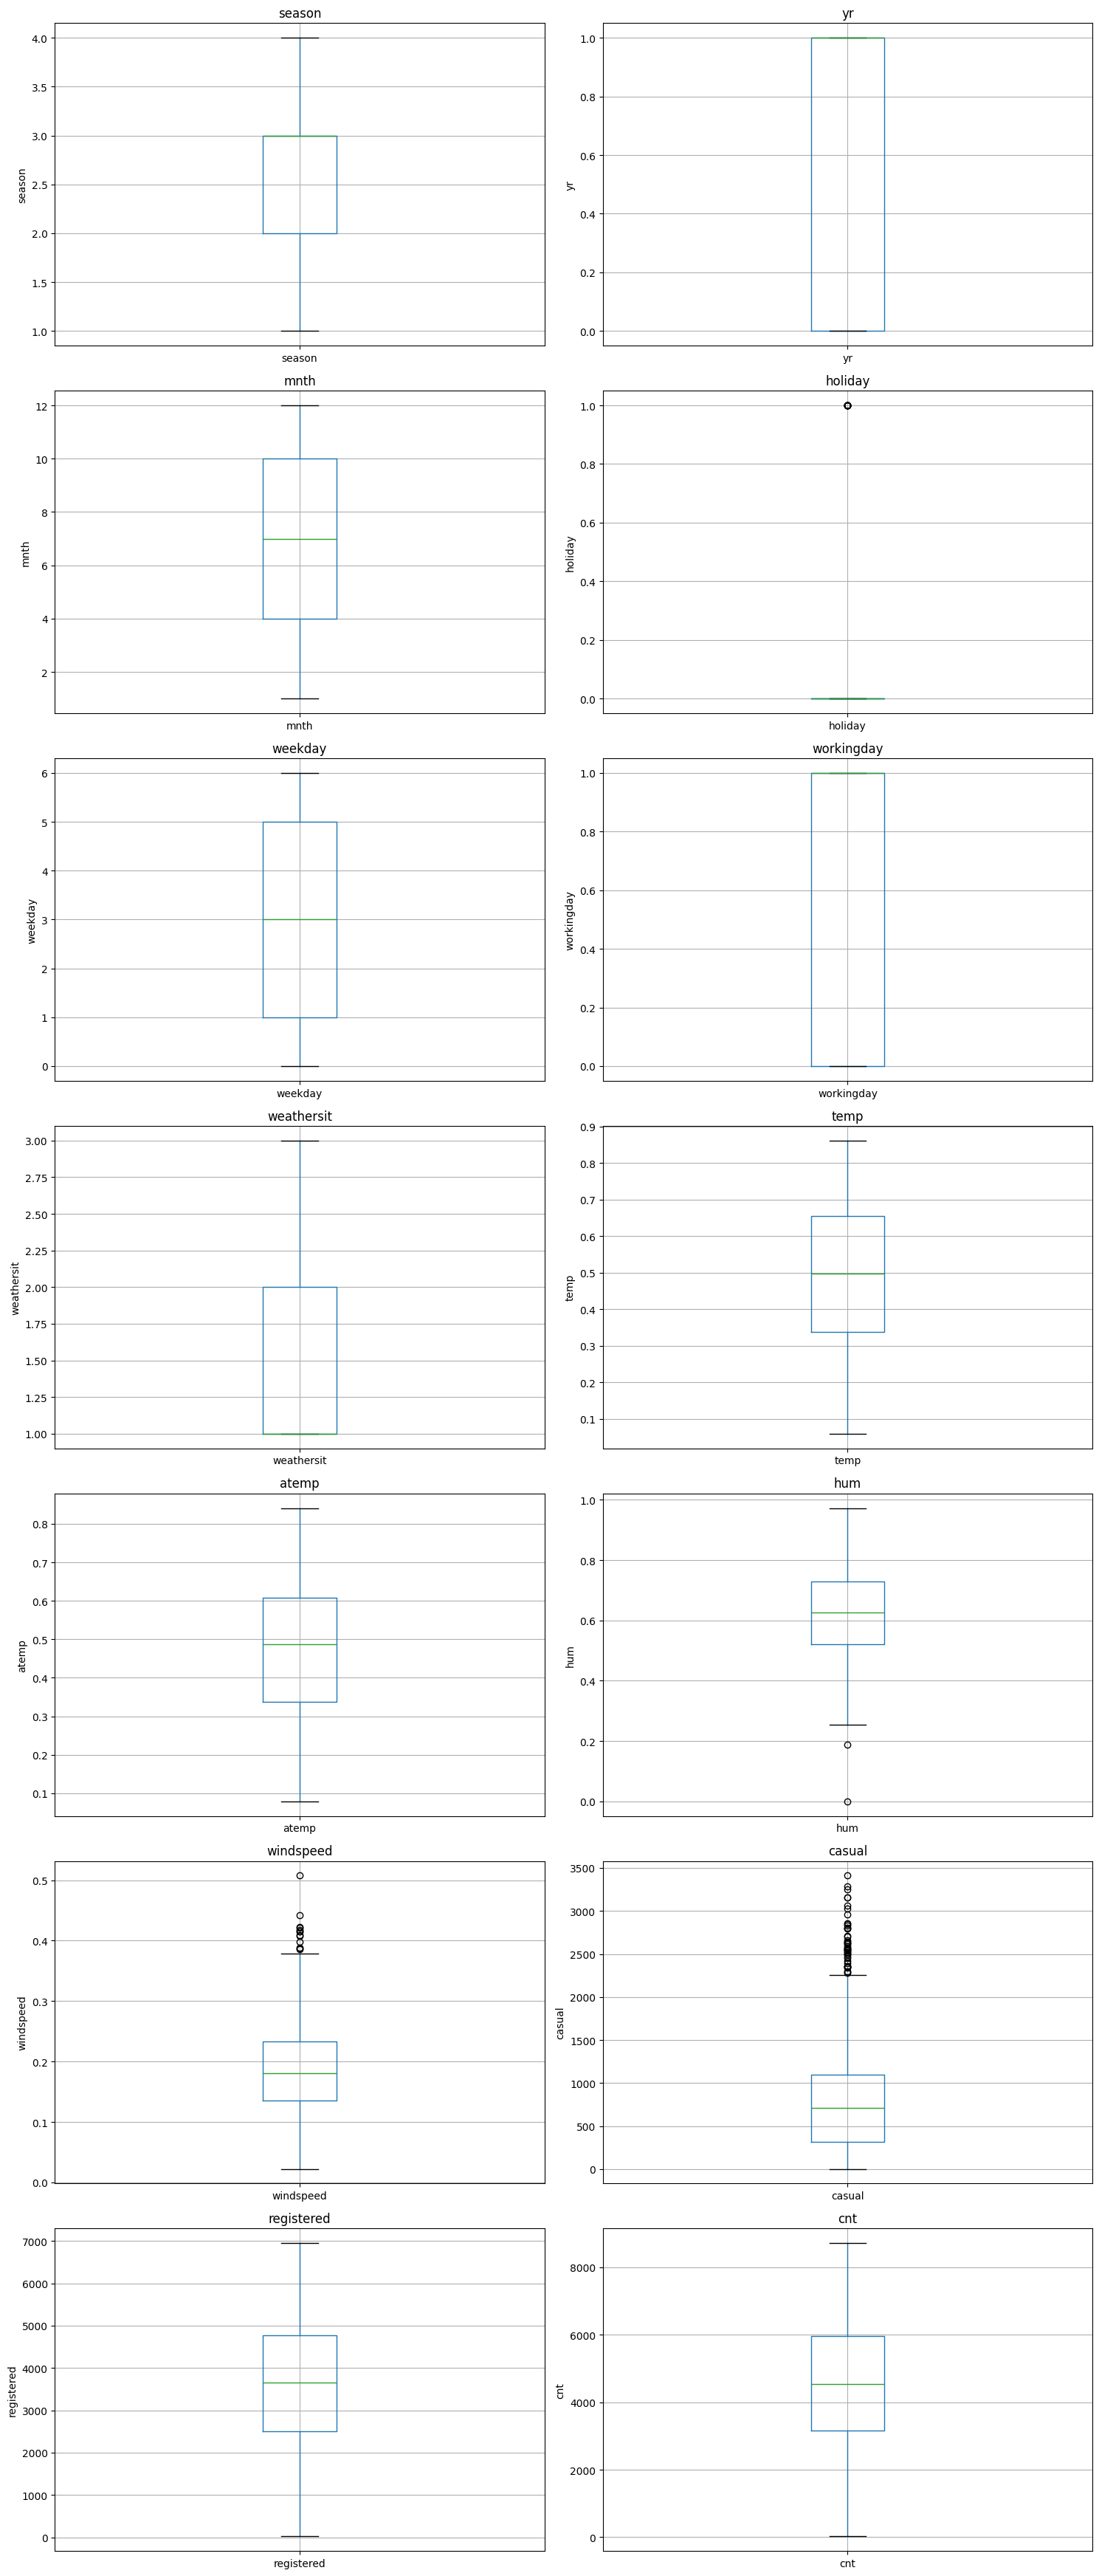

In [14]:
import matplotlib.pyplot as plt
df_numeric = data_day.select_dtypes(include=['number'])

num_cols = len(df_numeric.columns)
rows = (num_cols // 2) + (num_cols % 2)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(rows, 2, i)
    data_day.boxplot(column=col)
    plt.title(col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

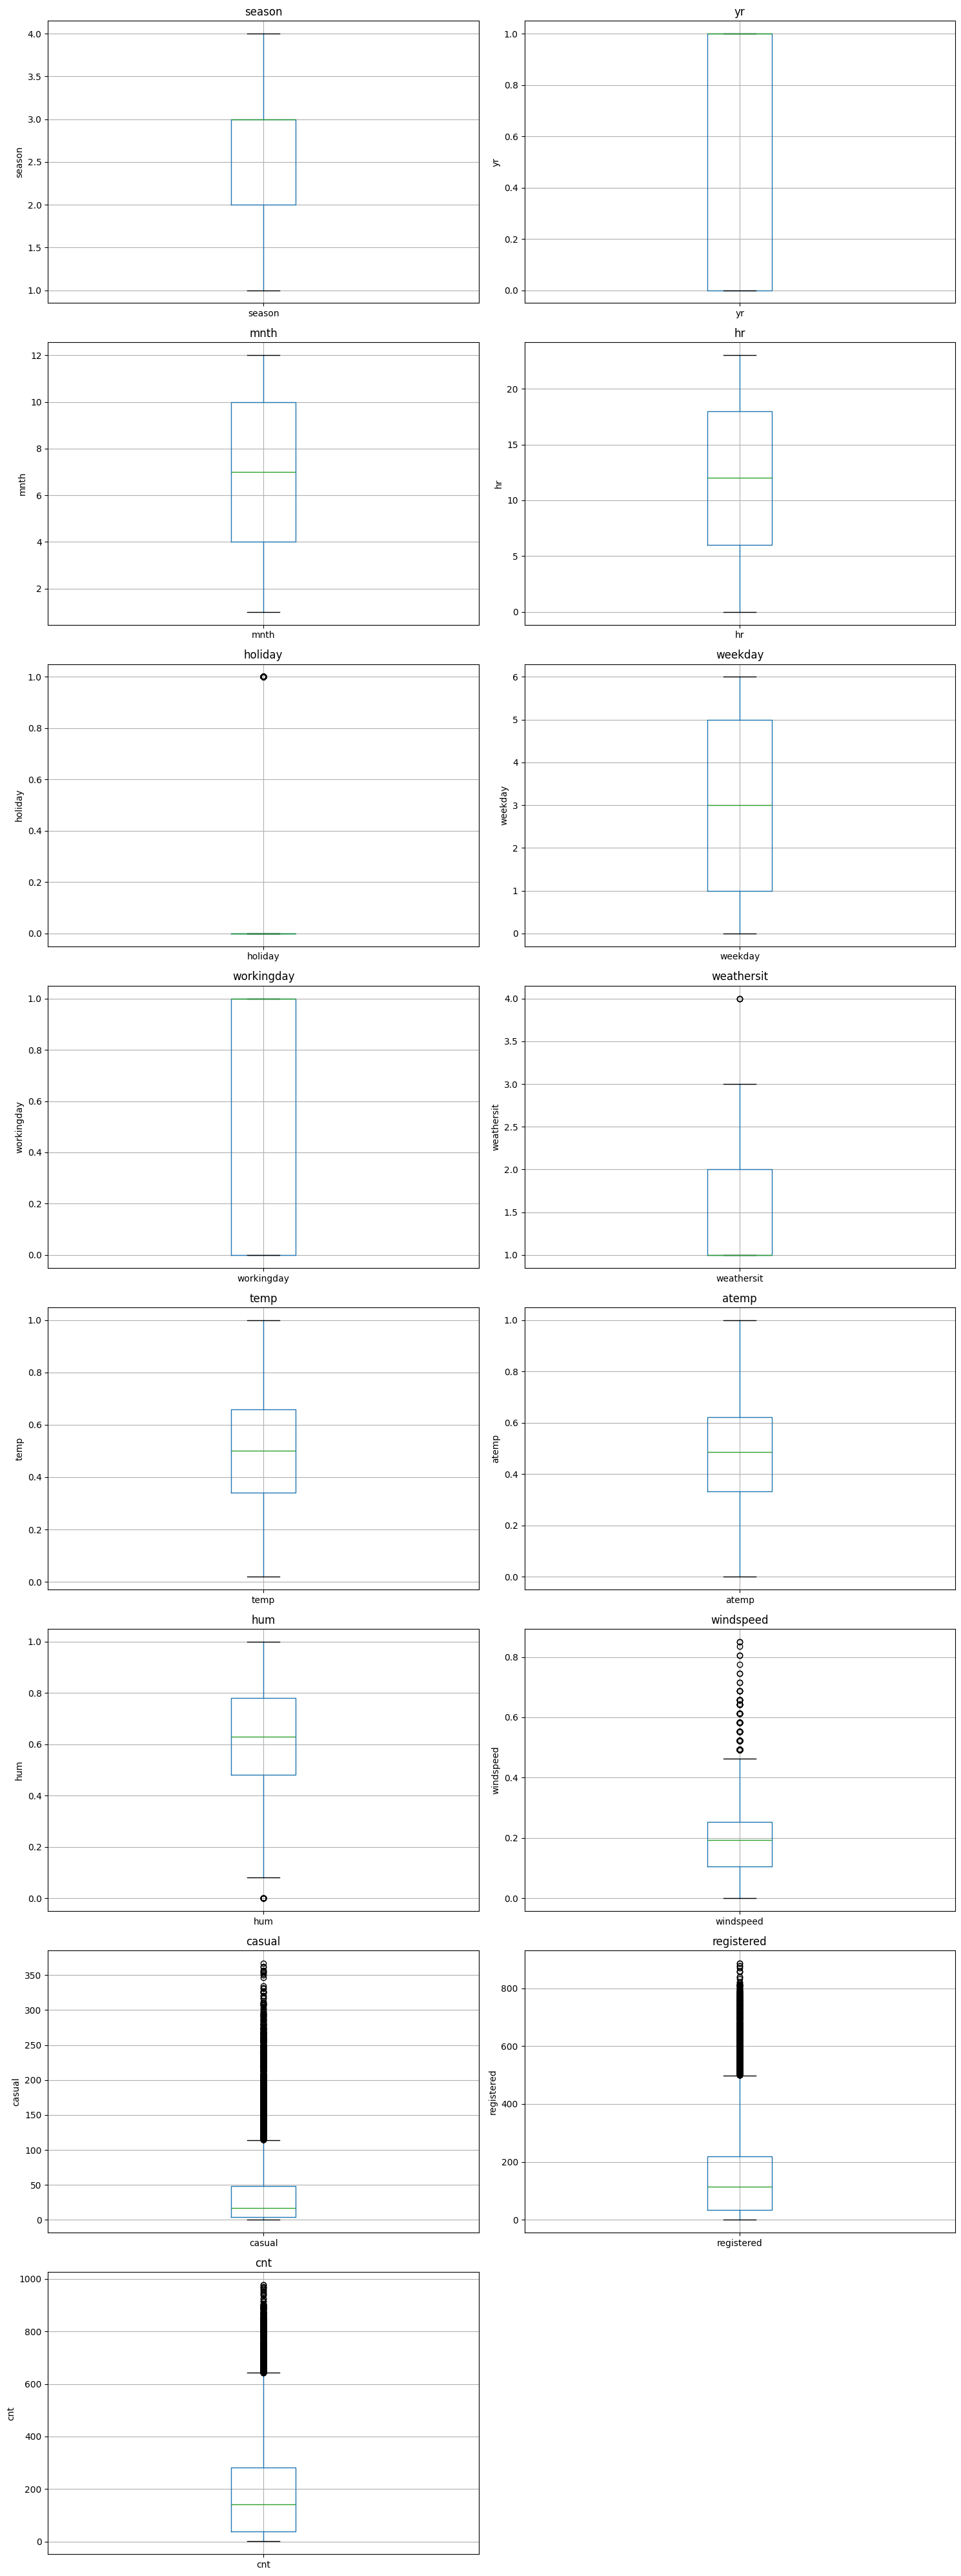

In [15]:
import matplotlib.pyplot as plt
df_numeric = data_hour.select_dtypes(include=['number'])

num_cols = len(df_numeric.columns)
rows = (num_cols // 2) + (num_cols % 2)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(rows, 2, i)
    data_hour.boxplot(column=col)
    plt.title(col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Insight:**
- Kedua dataset memiliki kolom yang sedikit berbeda dimana ada penambahan kolom "hr" pada dataset hour.csv
- Kedua dataset memiliki data yang cukup bersih dimana tidak ditemukannya data duplikat dan missing_value
- Terdapat beberapa kolom yang terdapat beberapa outlier yaitu kolom windspeed dan casual untuk dataset day dan untuk dataset

### Cleaning Data

In [ ]:
data_day = data_day.drop(columns='instant')
data_hour = data_hour.drop(columns='instant')

In [16]:
q1 = data_day['windspeed'].quantile(0.25)
q3 = data_day['windspeed'].quantile(0.75)
IQR = q3-q1
lower_limit = q1 - (IQR*1.5)
upper_limit = q3 + (IQR*1.5)
data_day.loc[data_day['windspeed']<lower_limit,'windspeed']=lower_limit
data_day.loc[data_day['windspeed']>upper_limit,'windspeed']=upper_limit

Text(0, 0.5, 'windspeed')

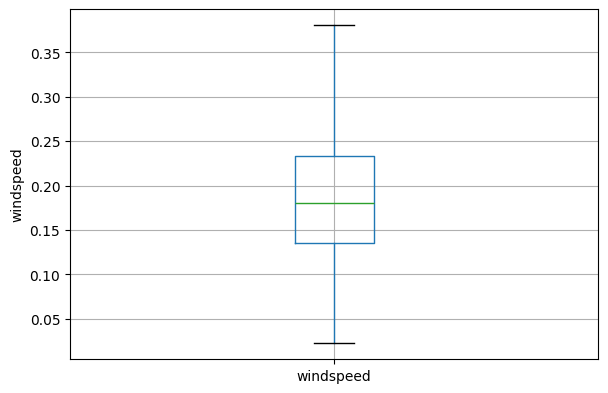

In [17]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data_day.boxplot(column='windspeed')
fig.set_title('')
fig.set_ylabel('windspeed')

In [18]:
q1 = data_hour['windspeed'].quantile(0.25)
q3 = data_hour['windspeed'].quantile(0.75)
IQR = q3-q1
lower_limit = q1 - (IQR*1.5)
upper_limit = q3 + (IQR*1.5)
data_hour.loc[data_hour['windspeed']<lower_limit,'windspeed']=lower_limit
data_hour.loc[data_hour['windspeed']>upper_limit,'windspeed']=upper_limit

Text(0, 0.5, 'windspeed')

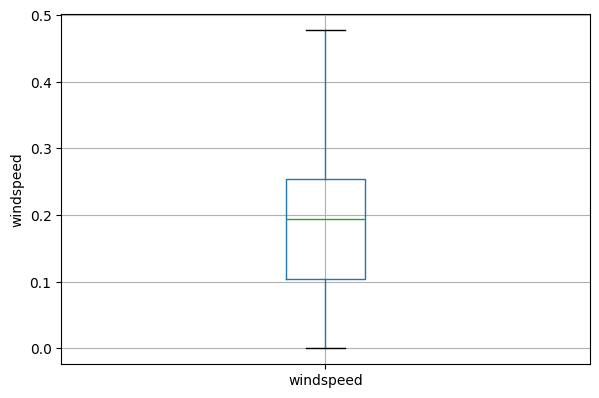

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data_hour.boxplot(column='windspeed')
fig.set_title('')
fig.set_ylabel('windspeed')

**Insight:**
- Karena tidak adanya duplikasi dan mising value maka tidak perlu melakukan pembersihan duplikasi dan missing valur
- terdapat data (bukan merupakan data target [casual, registered, cnt]) yang masih ada outlier, dibersikan menggunakan metode lower limit dan upper limit

## Exploratory Data Analysis (EDA)

### Explore Dataset Hour dan Day berdasarkan weather dan season

In [20]:
data_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.189846,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.075644,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.380611,3410.000000,6946.000000,8714.000000


In [21]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'], errors='coerce')
# Ekstrak tahun dan bulan
data_day['yr'] = data_day['dteday'].dt.year
data_day['mnth'] = data_day['dteday'].dt.month

In [22]:
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'], errors='coerce')
# Ekstrak tahun dan bulan
data_hour['yr'] = data_hour['dteday'].dt.year
data_hour['mnth'] = data_hour['dteday'].dt.month

In [23]:
data_day

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [24]:
avg_day_rentals_by_weathersits = data_day.groupby("weathersit")["cnt"].mean().reset_index()
avg_day_rentals_by_weathersits

,weathersit,cnt
0,1,4876.786177
1,2,4035.862348
2,3,1803.285714


In [25]:
avg_day_rentals_by_seasons = data_day.groupby("season")["cnt"].mean().reset_index()
avg_day_rentals_by_seasons


,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


In [26]:
avg_day_rentals_by_weathersits = data_hour.groupby("weathersit")["cnt"].mean().reset_index()
avg_day_rentals_by_weathersits


,weathersit,cnt
0,1,204.869272
1,2,175.165493
2,3,111.579281
3,4,74.333333


In [27]:
avg_hour_rentals_by_seasons = data_hour.groupby("season")["cnt"].mean().reset_index()
avg_hour_rentals_by_seasons

,season,cnt
0,1,111.114569
1,2,208.344069
2,3,236.016237
3,4,198.868856


In [28]:
data_hour.groupby("weathersit")["temp"].mean().reset_index()

,weathersit,temp
0,1,0.511054
1,2,0.474445
2,3,0.456688
3,4,0.186667


In [29]:
data_hour.groupby("season")["temp"].mean().reset_index()

,season,temp
0,1,0.299147
1,2,0.544663
2,3,0.706410
3,4,0.423138


**Insight:**
- Berdasarkan analisa diatas kedua dataset menunjukan rata rata peminjaman sepeda yang mirip dimana semakin buruk cuacanya akan semakin kecil
- Kedua dataset memiliki juga memiliki kemiripan dimana rata rata peminjaman sepeda paling besar ada dimusim gugur dan musim semi

## Visualization & Explanatory Analysis

### Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda dalam satu tahun?

In [30]:
data_all = pd.concat([data_day, data_hour], ignore_index=True)

In [31]:
data_all

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18105,2012-12-31,1,2012,12,0,1,1,2,0.260000,0.257600,0.600000,0.164200,11,108,119,19.0
18106,2012-12-31,1,2012,12,0,1,1,2,0.260000,0.257600,0.600000,0.164200,8,81,89,20.0
18107,2012-12-31,1,2012,12,0,1,1,1,0.260000,0.257600,0.600000,0.164200,7,83,90,21.0
18108,2012-12-31,1,2012,12,0,1,1,1,0.260000,0.272700,0.560000,0.134300,13,48,61,22.0


In [32]:
data_all

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18105,2012-12-31,1,2012,12,0,1,1,2,0.260000,0.257600,0.600000,0.164200,11,108,119,19.0
18106,2012-12-31,1,2012,12,0,1,1,2,0.260000,0.257600,0.600000,0.164200,8,81,89,20.0
18107,2012-12-31,1,2012,12,0,1,1,1,0.260000,0.257600,0.600000,0.164200,7,83,90,21.0
18108,2012-12-31,1,2012,12,0,1,1,1,0.260000,0.272700,0.560000,0.134300,13,48,61,22.0


In [45]:
data_all.to_csv('data_peminjaman.csv')

In [34]:
weather_data = data_all.groupby('weathersit')['cnt'].mean().reset_index()

C:\Users\ARKA JENAR\AppData\Local\Temp\ipykernel_17484\3209262050.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_data, ci=None, ax=ax)


Text(0.5, 1.0, 'Peminjaman Sepeda Berdasarkan Cuaca')

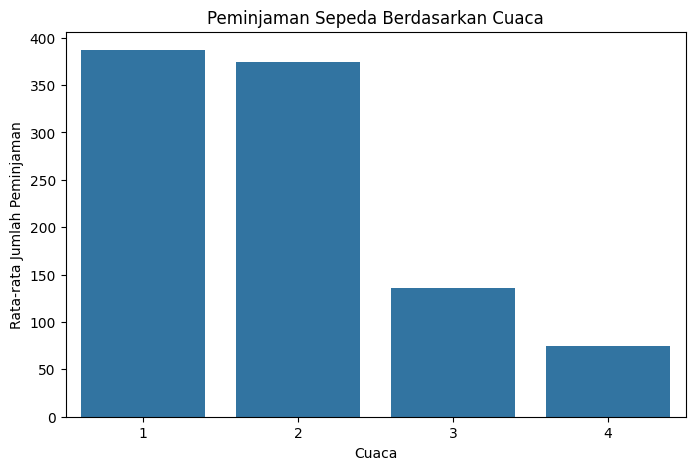

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=weather_data, ci=None, ax=ax)
ax.set_xlabel('Cuaca')
ax.set_ylabel('Rata-rata Jumlah Peminjaman')
ax.set_title('Peminjaman Sepeda Berdasarkan Cuaca')

### Bagaimana pola peminjaman sepeda berdasarkan musim dalam satu tahun?

In [41]:
season_data = data_all.groupby('season')['cnt'].mean().reset_index()

C:\Users\ARKA JENAR\AppData\Local\Temp\ipykernel_17484\4123048589.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=season_data, ci=None, ax=ax)


Text(0.5, 1.0, 'Peminjaman Sepeda Berdasarkan Musim')

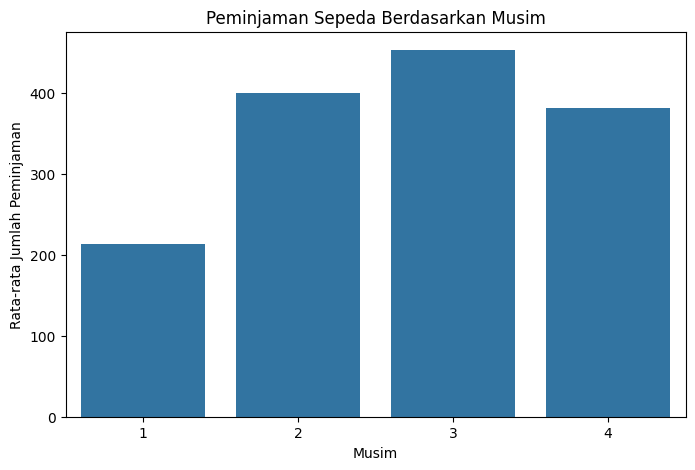

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=season_data, ci=None, ax=ax)
ax.set_xlabel('Musim')
ax.set_ylabel('Rata-rata Jumlah Peminjaman')
ax.set_title('Peminjaman Sepeda Berdasarkan Musim')

**Insight:**
- Baik buruknya cuaca sangat mempengaruhi tingkat peminjaman sepeda
- Jika dilihat dari musim yang paling tinggi adalah musim gugur, dan yang terendah adalah musim semi

## Analisis Lanjutan (Opsional)

## Conclusion

Berdasarkan analisis data peminjaman sepeda, ditemukan bahwa cuaca memiliki pengaruh yang bervariasi. Secara umum, jumlah peminjaman sepeda cenderung lebih tinggi pada cuaca cerah dan menurun saat hujan atau kondisi ekstrem.  

- Pada cuaca cerah, jumlah peminjaman mencapai puncaknya dengan rata-rata hampir 400 peminjaman per bulan, terutama pada hari dengan kondisi cuaca cerah.  
- Pada musim hujan, terjadi penurunan hingga hanya menyetuh hampir 100 peminjaman, menunjukkan peminjaman sedikit dilakukan saat curah hujan tinggi atau bersalju.   

Hal ini menunjukkan bahwa cuaca berdampak pada jumlah peminjaman,dan pengaruhnya lebih terasa pada kondisi cuaca ekstrem.  

**Rekomendasi:**  
Untuk meningkatkan efisiensi sistem penyewaan sepeda dan menjaga kestabilan jumlah peminjaman, berikut beberapa strategi yang dapat diterapkan:  

1. **Penyesuaian Tarif Musiman**  
   - Menerapkan tarif diskon atau promosi pada musim hujan untuk menarik lebih banyak pelanggan.  
   - Meningkatkan harga sedikit saat musim dengan permintaan tinggi untuk mengoptimalkan pendapatan.  

2. **Penyediaan Fasilitas Pelindung Cuaca**  
   - Menyediakan jas hujan gratis atau dengan harga terjangkau bagi pelanggan saat cuaca hujan deras.  
   - Menyediakan tempat parkir sepeda dengan atap di beberapa lokasi strategis untuk melindungi sepeda dari hujan.  